In [1]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

In [2]:
traindata = pd.read_csv('sign_mnist_train.csv')

In [3]:
trainlabel=traindata['label'].values

In [4]:
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values

In [5]:
trainimages=trainimages.reshape(-1,28,28,1)

In [6]:
testdata = pd.read_csv('sign_mnist_test.csv')

In [7]:
testlabel=testdata['label'].values

In [8]:
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values

In [9]:
testimages=testimages.reshape(-1,28,28,1)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
traingen=ImageDataGenerator(rotation_range=40,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                  shear_range=0.2,horizontal_flip=True,rescale=1/255.0,validation_split=0.2)

In [12]:
traindata_generator = traingen.flow(trainimages,trainlabel,subset='training')
validationdata_generator = traingen.flow(trainimages,trainlabel,subset='validation')

In [13]:
testgen=ImageDataGenerator(rescale=1/255.0)
testdata_generator = testgen.flow(testimages,testlabel)

In [14]:
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
# model.add(Conv2D(64,(3,3),activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
# model.add(Conv2D(128,(3,3),activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(26,activation="softmax"))



In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 128)       512       
 chNormalization)                                                
                                                        

In [17]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.985):
      print("\nReached 98.5% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [18]:
history=model.fit(traindata_generator,epochs=60,validation_data=validationdata_generator,callbacks=[callback])

Epoch 1/60
687/687 [==============================] - 23s 21ms/step - loss: 2.3738 - accuracy: 0.2862 - val_loss: 3.5915 - val_accuracy: 0.1568
Epoch 2/60
687/687 [==============================] - 14s 20ms/step - loss: 1.4927 - accuracy: 0.5182 - val_loss: 1.6405 - val_accuracy: 0.4904
Epoch 3/60
687/687 [==============================] - 14s 21ms/step - loss: 1.1597 - accuracy: 0.6166 - val_loss: 1.1498 - val_accuracy: 0.6287
Epoch 4/60
687/687 [==============================] - 14s 20ms/step - loss: 0.9663 - accuracy: 0.6802 - val_loss: 3.6222 - val_accuracy: 0.2763
Epoch 5/60
687/687 [==============================] - 14s 20ms/step - loss: 0.8399 - accuracy: 0.7209 - val_loss: 3.3742 - val_accuracy: 0.3409
Epoch 6/60
687/687 [==============================] - 14s 20ms/step - loss: 0.7726 - accuracy: 0.7390 - val_loss: 2.4222 - val_accuracy: 0.3761
Epoch 7/60
687/687 [==============================] - 14s 20ms/step - loss: 0.7017 - accuracy: 0.7643 - val_loss: 0.5887 - val_accuracy:

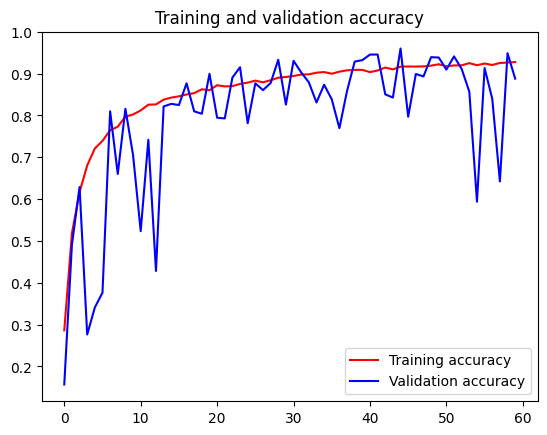

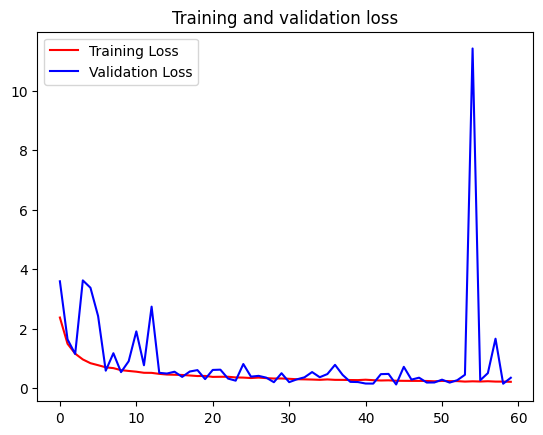

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
print("test accuracy: "+ str(model.evaluate_generator(testdata_generator)[1]*100))

<ipython-input-20-3869c0eee6ae>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  print("test accuracy: "+ str(model.evaluate_generator(testdata_generator)[1]*100))


test accuracy: 97.83881902694702


In [21]:
history=model.fit(traindata_generator,epochs=100,validation_data=validationdata_generator,callbacks=[callback],initial_epoch=60)

Epoch 61/100
687/687 [==============================] - 14s 20ms/step - loss: 0.2109 - accuracy: 0.9269 - val_loss: 0.4283 - val_accuracy: 0.8654
Epoch 62/100
687/687 [==============================] - 14s 20ms/step - loss: 0.2203 - accuracy: 0.9260 - val_loss: 0.1643 - val_accuracy: 0.9441
Epoch 63/100
687/687 [==============================] - 16s 23ms/step - loss: 0.2214 - accuracy: 0.9251 - val_loss: 0.3056 - val_accuracy: 0.8989
Epoch 64/100
687/687 [==============================] - 14s 20ms/step - loss: 0.2130 - accuracy: 0.9281 - val_loss: 0.1551 - val_accuracy: 0.9472
Epoch 65/100
687/687 [==============================] - 14s 20ms/step - loss: 0.2084 - accuracy: 0.9317 - val_loss: 0.2858 - val_accuracy: 0.9069
Epoch 66/100
687/687 [==============================] - 14s 20ms/step - loss: 0.1989 - accuracy: 0.9333 - val_loss: 0.2080 - val_accuracy: 0.9330
Epoch 67/100
687/687 [==============================] - 14s 20ms/step - loss: 0.2083 - accuracy: 0.9284 - val_loss: 0.2921 -

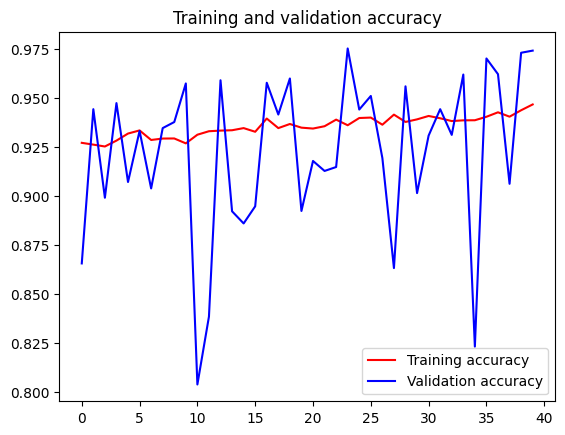

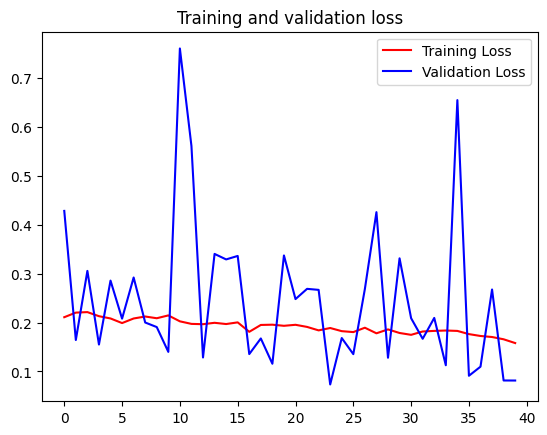

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
print("test accuracy: "+ str(model.evaluate_generator(testdata_generator)[1]*100))

<ipython-input-23-3869c0eee6ae>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  print("test accuracy: "+ str(model.evaluate_generator(testdata_generator)[1]*100))


test accuracy: 99.19130206108093
